In [1]:
# Bibliotecas utilizadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Datasets utilizados
df_majors = pd.read_csv('./data/Mens_Tennis_Grand_Slam_Winner.csv')
df_ATP_1973_to_2010 = pd.read_csv('./data/df_ATP_1973_to_2010.csv')

# Dataset - Ganadores 4 Grand Slams

In [3]:
df_majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         292 non-null    int64  
 1   TOURNAMENT                   292 non-null    object 
 2   WINNER                       292 non-null    object 
 3   RUNNER-UP                    292 non-null    object 
 4   WINNER_NATIONALITY           292 non-null    object 
 5   WINNER_ATP_RANKING           63 non-null     float64
 6   RUNNER-UP_ATP_RANKING        64 non-null     float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  292 non-null    object 
 8   TOURNAMENT_SURFACE           292 non-null    object 
 9   WINNER_PRIZE                 217 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 22.9+ KB


In [4]:
df_majors.value_counts()

YEAR  TOURNAMENT       WINNER          RUNNER-UP           WINNER_NATIONALITY  WINNER_ATP_RANKING  RUNNER-UP_ATP_RANKING  WINNER_LEFT_OR_RIGHT_HANDED  TOURNAMENT_SURFACE     WINNER_PRIZE
2007  Australian Open  Roger Federer   Fernando Gonzalez   Swiss               1.0                 7.0                    right                        Rebound Ace            1281000.0       1
2018  Wimbledon        Novak Djokovic  Kevin Anderson      Serbian             1.0                 6.0                    right                        Grass / Outdoor        2250000.0       1
2015  U.S. Open        Novak Djokovic  Roger Federer       Serbian             1.0                 3.0                    right                        DecoTurf - outdoors    3300000.0       1
      Wimbledon        Novak Djokovic  Roger Federer       Serbian             1.0                 3.0                    right                        Grass / Outdoor        1880000.0       1
2016  Australian Open  Novak Djokovic  Andy M

In [5]:
df_majors.head()

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,Novak Djokovic,Stefanos Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,Carlos Alcaraz,Casper Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,Novak Djokovic,Nick Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2507460.0
3,2022,French Open,Rafael Nadal,Casper Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,Rafael Nadal,Daniil Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0


In [6]:
# Funcion convertir nombres 
def convertir_nombre(nombre):
    partes = nombre.split()
    inicial = partes[0][0]  
    apellido = partes[-1]  
    return f'{inicial}. {apellido}'

In [7]:
# Convertir nombres para trabajar mejor
df_majors['WINNER'] = df_majors['WINNER'].apply(convertir_nombre)
df_majors['RUNNER-UP'] = df_majors['RUNNER-UP'].apply(convertir_nombre)

df_majors

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,C. Alcaraz,C. Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2507460.0
3,2022,French Open,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0
...,...,...,...,...,...,...,...,...,...,...
287,1951,Australian Open,D. Savitt,K. McGregor,American,NaN,NaN,right,Grass,NaN
288,1950,U.S. Open,A. Larsen,H. Flam,American,NaN,NaN,right,outdoors,NaN
289,1950,Wimbledon,J. Patty,F. Sedgman,American,NaN,NaN,right,Grass / Outdoor,NaN
290,1950,French Open,B. Patty,J. Drobny,American,NaN,NaN,right,Clay,NaN


In [8]:
nulos = (df_majors.isnull().mean())*100
nulos

YEAR                            0.000000
TOURNAMENT                      0.000000
WINNER                          0.000000
RUNNER-UP                       0.000000
WINNER_NATIONALITY              0.000000
WINNER_ATP_RANKING             78.424658
RUNNER-UP_ATP_RANKING          78.082192
WINNER_LEFT_OR_RIGHT_HANDED     0.000000
TOURNAMENT_SURFACE              0.000000
WINNER_PRIZE                   25.684932
dtype: float64

In [9]:
# Columnas con nulos 
df_majors[['WINNER_ATP_RANKING','RUNNER-UP_ATP_RANKING', 'WINNER_PRIZE']]

,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_PRIZE
0,1.0,3.0,2050000.0
1,2.0,5.0,2600000.0
2,NaN,25.0,2507460.0
3,5.0,8.0,1870000.0
4,5.0,2.0,4400000.0
...,...,...,...
287,NaN,NaN,NaN
288,NaN,NaN,NaN
289,NaN,NaN,NaN
290,NaN,NaN,NaN


In [10]:
# Cambio de Australian Open (Dec / Jan) por Australian Open
df_majors['TOURNAMENT'] = df_majors['TOURNAMENT'].str.replace(r'Australian Open \(Dec\)|Australian Open \(Jan\)', 'Australian Open', regex = True)
df_majors['TOURNAMENT'] = df_majors['TOURNAMENT'].str.replace(r'French Open', 'Roland Garros', regex = True)

In [11]:
df_majors['TOURNAMENT'].value_counts()

TOURNAMENT
Australian Open    74
U.S. Open          73
Roland Garros      73
Wimbledon          72
Name: count, dtype: int64

In [12]:
tournament_prize_stats = df_majors.groupby('TOURNAMENT')['WINNER_PRIZE'].agg(['mean', 'max', 'min', 'count'])
tournament_prize_stats

,mean,max,min,count
TOURNAMENT,,,,
Australian Open,1.156032e+06,4400000.0,2000.0,53
Roland Garros,1.466629e+06,4538000.0,15000.0,55
U.S. Open,1.013036e+06,3850000.0,14000.0,55
Wimbledon,5.990386e+05,2507460.0,2000.0,54


In [13]:
# Nuevos valores de premios como un diccionario
nuevos_premios = {
    'Australian Open': 1800000,
    'Roland Garros': 2496000,  
    'U.S. Open': 2600000,
    'Wimbledon': 2400000
}

In [14]:
# Función para actualizar los valores de 'WINNER_PRIZE' basándose en el torneo
def update_winner_prize(row):
    if row['TOURNAMENT'] in nuevos_premios:
        return nuevos_premios[row['TOURNAMENT']]
    else:
        return row['WINNER_PRIZE']

In [15]:
# Aplicar la función para actualizar la columna
df_majors['WINNER_PRIZE'] = df_majors.apply(update_winner_prize, axis=1)

In [16]:
# Mostrar los resultados para verificar que los cambios se han aplicado correctamente
df_majors[['TOURNAMENT', 'WINNER_PRIZE']].drop_duplicates()


,TOURNAMENT,WINNER_PRIZE
0,Australian Open,1800000
1,U.S. Open,2600000
2,Wimbledon,2400000
3,Roland Garros,2496000


In [17]:
df_majors.head(10)

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,1800000
1,2022,U.S. Open,C. Alcaraz,C. Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2400000
3,2022,Roland Garros,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,2496000
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,1800000
5,2021,U.S. Open,D. Medvedev,N. Djokovic,Russian,2.0,1.0,right,DecoTurf - outdoors,2600000
6,2021,Wimbledon,N. Djokovic,M. Berrettini,Serbian,1.0,7.0,right,Grass / Outdoor,2400000
7,2021,Roland Garros,N. Djokovic,S. Tsitsipas,Serbian,1.0,4.0,right,Clay,2496000
8,2021,Australian Open,N. Djokovic,D. Medvedev,Serbian,1.0,2.0,right,Plexicushion Prestige,1800000
9,2020,Roland Garros,R. Nadal,N. Djokovic,Spanish,2.0,1.0,left,Clay,2496000


In [18]:
# Año 1977 hay un error, 2 Australian Open, elimino el incorrecto
df_majors[df_majors['YEAR'] == 1977]

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
179,1977,Australian Open,V. Gerulaitis,J. Lloyd,American,NaN,NaN,right,Grass,1800000
180,1977,U.S. Open,G. Vilas,J. Connors,Argentine,NaN,NaN,left,Clay - outdoors,2600000
181,1977,Wimbledon,B. Borg,J. Connors,Swedish,NaN,NaN,right,Grass / Outdoor,2400000
182,1977,Roland Garros,G. Vilas,B. Gottfried,Argentine,NaN,NaN,left,Clay,2496000
183,1977,Australian Open,R. Tanner,G. Vilas,American,NaN,NaN,left,Grass,1800000


In [19]:
df_majors = df_majors.drop(179)

# Dataset - Ranking 1973-2010

In [20]:
# Data ranking completo 
df_ATP_1973_to_2010.head()

,Posicion,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,I. Nastase,J. Connors,J. Connors,J. Connors,J. Connors,J. Connors,B. Borg,B. Borg,J. McEnroe,...,R. Nadal,N. Djokovic,R. Federer,N. Djokovic,N. Djokovic,N. Djokovic,N. Djokovic,R. Nadal,R. Nadal,N. Djokovic
1,2,J. Newcombe,J. Newcombe,G. Vilas,B. Borg,B. Borg,B. Borg,J. Connors,J. McEnroe,B. Borg,...,N. Djokovic,R. Nadal,N. Djokovic,R. Nadal,R. Nadal,R. Federer,A. Murray,R. Federer,R. Federer,R. Nadal
2,3,M. Orantes,R. Laver,M. Orantes,G. Vilas,B. Gottfried,G. Vilas,J. McEnroe,J. Connors,J. Connors,...,R. Federer,R. Federer,A. Murray,A. Murray,R. Federer,A. Murray,S. Wawrinka,A. Murray,N. Djokovic,R. Federer
3,4,S. Smith,B. Borg,B. Borg,I. Nastase,G. Vilas,V. Gerulaitis,R. Tanner,G. Vilas,I. Lendl,...,A. Murray,A. Murray,R. Nadal,D. Ferrer,S. Wawrinka,S. Wawrinka,R. Nadal,A. Zverev,J. del Potro,D. Medvedev
4,5,J. Connors,T. Okker,A. Ashe,A. Panatta,M. Orantes,E. Dibbs,V. Gerulaitis,H. Solomon,J. Clerc,...,R. Soderling,D. Ferrer,D. Ferrer,R. Federer,D. Ferrer,T. Berdych,K. Nishikori,M. Cilic,A. Zverev,D. Thiem


In [21]:
# Paso a vertical 
rankings_long = df_ATP_1973_to_2010.melt(id_vars=['Posicion'], var_name='YEAR', value_name='Player')
rankings_long['YEAR'] = rankings_long['YEAR'].astype(int) 
rankings_long

,Posicion,YEAR,Player
0,1,1973,I. Nastase
1,2,1973,J. Newcombe
2,3,1973,M. Orantes
3,4,1973,S. Smith
4,5,1973,J. Connors
...,...,...,...
4695,96,2019,C. Moutet
4696,97,2019,B. Klahn
4697,98,2019,E. Gerasimov
4698,99,2019,J. Munar


In [22]:
# Crear el diccionario de mapeo
ranking_dict = dict(zip(zip(rankings_long['YEAR'], rankings_long['Player']), rankings_long['Posicion']))

In [23]:
# Función para rellenar los rankings
def fill_ranking(row):
    year = row['YEAR']
    if pd.isna(row['WINNER_ATP_RANKING']) and (year, row['WINNER']) in ranking_dict:
        row['WINNER_ATP_RANKING'] = ranking_dict[(year, row['WINNER'])]
    if pd.isna(row['RUNNER-UP_ATP_RANKING']) and (year, row['RUNNER-UP']) in ranking_dict:
        row['RUNNER-UP_ATP_RANKING'] = ranking_dict[(year, row['RUNNER-UP'])]
    return row

In [24]:
# Aplicar la función a cada fila del dataframe principal
df_majors = df_majors.apply(fill_ranking, axis=1)

In [25]:
df_majors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 291
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         291 non-null    int64  
 1   TOURNAMENT                   291 non-null    object 
 2   WINNER                       291 non-null    object 
 3   RUNNER-UP                    291 non-null    object 
 4   WINNER_NATIONALITY           291 non-null    object 
 5   WINNER_ATP_RANKING           197 non-null    float64
 6   RUNNER-UP_ATP_RANKING        192 non-null    float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  291 non-null    object 
 8   TOURNAMENT_SURFACE           291 non-null    object 
 9   WINNER_PRIZE                 291 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 25.0+ KB


In [26]:
# Elimino filas anteriores a 1973 (ya que no hay datos respecto al ranking ATP)
df_majors = df_majors[df_majors['YEAR'] >= 1973]
print("El año más antiguo en df_majors ahora es:", df_majors['YEAR'].min())

El año más antiguo en df_majors ahora es: 1973


In [27]:
# Cambio manual de nulos (ha habido problemas de lectura por nombres raros)
df_majors.at[2, 'WINNER_ATP_RANKING'] = 3.0
df_majors.at[83, 'WINNER_ATP_RANKING'] = 10.0
df_majors.at[135, 'RUNNER-UP_ATP_RANKING'] = 13.0
df_majors.at[144, 'RUNNER-UP_ATP_RANKING'] = 9.0
df_majors.at[157, 'RUNNER-UP_ATP_RANKING'] = 51.0
df_majors.at[163, 'RUNNER-UP_ATP_RANKING'] = 108.0
df_majors.at[174, 'RUNNER-UP_ATP_RANKING'] = 16.0
df_majors.at[175, 'RUNNER-UP_ATP_RANKING'] = 114.0
df_majors.at[185, 'RUNNER-UP_ATP_RANKING'] = 10.0
df_majors.at[186, 'RUNNER-UP_ATP_RANKING'] = 10.0

In [28]:
df_majors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         199 non-null    int64  
 1   TOURNAMENT                   199 non-null    object 
 2   WINNER                       199 non-null    object 
 3   RUNNER-UP                    199 non-null    object 
 4   WINNER_NATIONALITY           199 non-null    object 
 5   WINNER_ATP_RANKING           199 non-null    float64
 6   RUNNER-UP_ATP_RANKING        199 non-null    float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  199 non-null    object 
 8   TOURNAMENT_SURFACE           199 non-null    object 
 9   WINNER_PRIZE                 199 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 25.2+ KB


# ANALISIS

## Hipotesis 1 - Los ganadores siempre son Top 10

In [29]:
# Media ATP de ganadores de cada torneo
ganadores_torneos = df_majors.groupby('TOURNAMENT')['WINNER_ATP_RANKING'].mean().round(1)
ganadores_torneos

TOURNAMENT
Australian Open    4.7
Roland Garros      3.1
U.S. Open          2.4
Wimbledon          2.6
Name: WINNER_ATP_RANKING, dtype: float64

In [30]:
# Agrupa por 'TOURNAMENT' y obtiene todos los rankings ATP de los ganadores
rankings_por_torneo = df_majors.groupby('TOURNAMENT')['WINNER_ATP_RANKING'].apply(list)
rankings_por_torneo

TOURNAMENT
Australian Open    [1.0, 5.0, 1.0, 1.0, 2.0, 3.0, 2.0, 2.0, 1.0, ...
Roland Garros      [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 4.0, 3.0, ...
U.S. Open          [2.0, 2.0, 3.0, 1.0, 1.0, 1.0, 4.0, 1.0, 9.0, ...
Wimbledon          [3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 4.0, ...
Name: WINNER_ATP_RANKING, dtype: object

In [31]:
# Provided average rankings
medias_torneos = {
    'Australian Open': 4.7,
    'Roland Garros': 3.1,
    'U.S. Open': 2.4,
    'Wimbledon': 2.6
}

colors = {
    'Australian Open': 'darkblue',
    'Roland Garros': 'saddlebrown',
    'Wimbledon': 'green',
    'U.S. Open': 'teal'
}

# # Sort the dictionary by values
orden_medias = dict(sorted(medias_torneos.items(), key=lambda item: item[1], reverse=True))


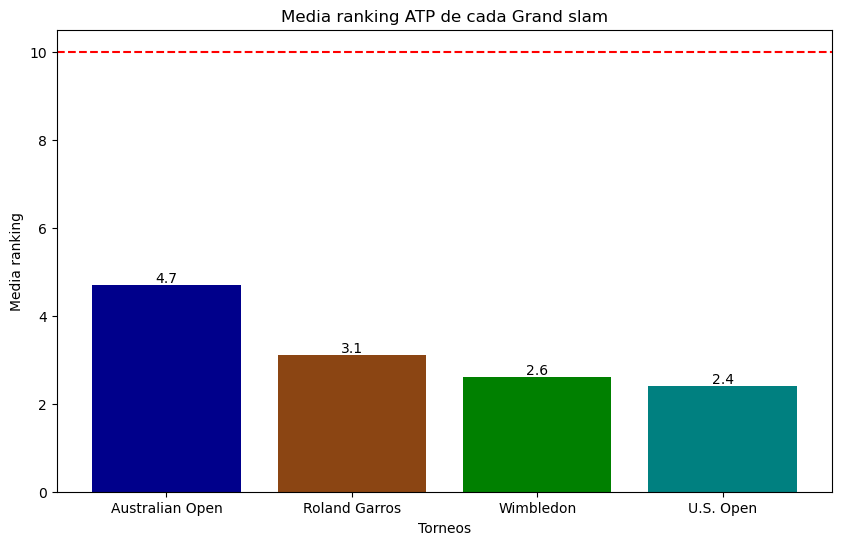

In [32]:
# Adding a horizontal line to the bar plot to check if the average rankings are within the top 10

plt.figure(figsize=(10, 6))
bars = plt.bar(orden_medias.keys(), orden_medias.values(), color=[colors[t] for t in orden_medias.keys()])

# Line indicating the threshold for top 10
plt.axhline(y=10, color='r', linestyle='--')

plt.xlabel('Torneos')
plt.ylabel('Media ranking')
plt.title('Media ranking ATP de cada Grand slam')

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha="center", va='bottom')  # va: vertical alignment


plt.show()


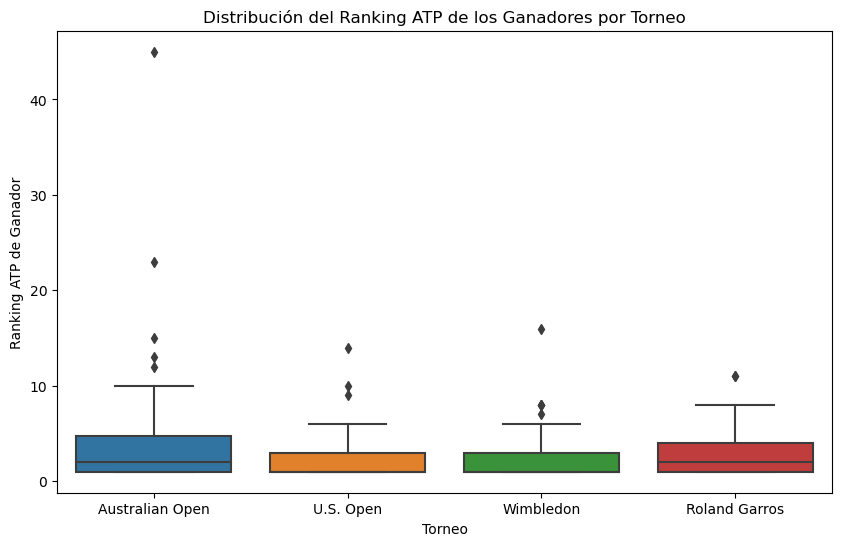

In [33]:
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x = 'TOURNAMENT', y = 'WINNER_ATP_RANKING', data = df_majors)

# Etiquetas
plt.xlabel('Torneo')
plt.ylabel('Ranking ATP de Ganador')
plt.title('Distribución del Ranking ATP de los Ganadores por Torneo')

plt.show()

In [34]:
# Calcular Q1 y Q3
Q1 = df_majors['WINNER_ATP_RANKING'].quantile(0.25)
Q3 = df_majors['WINNER_ATP_RANKING'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df_majors[(df_majors['WINNER_ATP_RANKING'] < lower_bound) | (df_majors['WINNER_ATP_RANKING'] > upper_bound)]

# Ordenar outliers por 'TOURNAMENT'
outliers_sorted = outliers.sort_values(by='TOURNAMENT')

In [35]:
outliers_sorted

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
83,2002,Australian Open,T. Johannson,M. Safin,Swedish,10.0,4.0,right,Rebound Ace,1800000
147,1985,Australian Open,S. Edberg,M. Wilander,Swedish,9.0,3.0,right,Grass,1800000
159,1982,Australian Open,J. Kriek,S. Denton,American,13.0,15.0,right,Grass,1800000
163,1981,Australian Open,J. Kriek,S. Denton,American,15.0,108.0,right,Grass,1800000
167,1980,Australian Open,B. Teacher,K. Warwick,American,23.0,38.0,right,Grass,1800000
183,1977,Australian Open,R. Tanner,G. Vilas,American,12.0,4.0,left,Grass,1800000
187,1976,Australian Open,M. Edmondson,J. Newcombe,Australian,45.0,21.0,right,Grass,1800000
102,1997,Roland Garros,G. Kuerten,S. Bruguera,Brazilian,11.0,6.0,right,Clay,2496000
162,1982,Roland Garros,M. Wilander,G. Vilas,Swedish,11.0,4.0,right,Clay,2496000
32,2014,U.S. Open,M. Cilic,K. Nishikori,Croatian,9.0,5.0,right,DecoTurf - outdoors,2600000


#### En Wimbledon y Roland Garros destacan por tener los ganadores que usualmente estan clasificaods mas altos. US Open y Australian Open son menos predecibles, tienen una gama de ganadores mas amplia con respecto al ranking. 
A pesar de que en el Wimbledon y Roland Garros haya mayor prevision de ganadores mejor clasificados, tambien hay mas valores atipicos, es decir el tenis tiene un enorme potencial para dar sorpresas y posibilitar que cualquier "no favorito" consiga ganar un major.

## Hipotesis 2 - El ganador de un año repite el siguiente año como ganador 

In [36]:
# DataFrame con los ganadores y el número de veces que han ganado cada torneo
numero_victorias = df_majors.groupby(['TOURNAMENT', 'WINNER']).size().reset_index(name='COUNTS')
numero_victorias

,TOURNAMENT,WINNER,COUNTS
0,Australian Open,A. Agassi,4
1,Australian Open,B. Becker,2
2,Australian Open,B. Teacher,1
3,Australian Open,G. Vilas,2
4,Australian Open,I. Lendl,2
...,...,...,...
83,Wimbledon,P. Sampras,7
84,Wimbledon,R. Federer,8
85,Wimbledon,R. Krajicek,1
86,Wimbledon,R. Nadal,2


In [37]:
# Filtrar para obtener solo las entradas donde un jugador ha ganado un torneo más de una vez
victorias_repetidas = numero_victorias[numero_victorias['COUNTS'] > 1]
victorias_repetidas.head(10)

,TOURNAMENT,WINNER,COUNTS
0,Australian Open,A. Agassi,4
1,Australian Open,B. Becker,2
3,Australian Open,G. Vilas,2
4,Australian Open,I. Lendl,2
6,Australian Open,J. Courier,2
7,Australian Open,J. Kriek,2
8,Australian Open,J. Newcombe,2
11,Australian Open,M. Wilander,3
12,Australian Open,N. Djokovic,10
14,Australian Open,P. Sampras,2


In [38]:
# Contar el número total de torneos repetidos ganados por cada jugador.
total_victorias_repetidas = victorias_repetidas.groupby('WINNER')['COUNTS'].sum().reset_index()
total_victorias_repetidas

,WINNER,COUNTS
0,A. Agassi,6
1,A. Murray,2
2,B. Becker,5
3,B. Borg,11
4,G. Kuerten,3
5,G. Vilas,2
6,I. Lendl,8
7,J. Connors,7
8,J. Courier,4
9,J. Kriek,2


In [39]:
# Ordenar los jugadores por el número total de torneos repetidos ganados
top_victorias_repetidas = total_victorias_repetidas.sort_values(by = 'COUNTS', ascending=False).head(10)
top_victorias_repetidas

,WINNER,COUNTS
17,R. Nadal,22
13,N. Djokovic,22
16,R. Federer,19
15,P. Sampras,14
3,B. Borg,11
6,I. Lendl,8
10,J. McEnroe,7
7,J. Connors,7
12,M. Wilander,6
0,A. Agassi,6


In [40]:
# Filtrar el DataFrame original para incluir solo esos 10 jugadores.
df_top_victorias = df_majors[df_majors['WINNER'].isin(top_victorias_repetidas['WINNER'])]
df_top_victorias

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,1800000
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,3.0,25.0,right,Grass / Outdoor,2400000
3,2022,Roland Garros,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,2496000
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,1800000
6,2021,Wimbledon,N. Djokovic,M. Berrettini,Serbian,1.0,7.0,right,Grass / Outdoor,2400000
...,...,...,...,...,...,...,...,...,...,...
190,1975,Roland Garros,B. Borg,G. Vilas,Swedish,4.0,2.0,right,Clay,2496000
192,1974,U.S. Open,J. Connors,K. Rosewall,American,1.0,7.0,left,outdoors,2600000
193,1974,Wimbledon,J. Connors,K. Rosewall,American,1.0,7.0,left,Grass / Outdoor,2400000
194,1974,Roland Garros,B. Borg,M. Orantes,Swedish,4.0,13.0,right,Clay,2496000


C:\Users\admin\AppData\Local\Temp\ipykernel_19960\1463231434.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


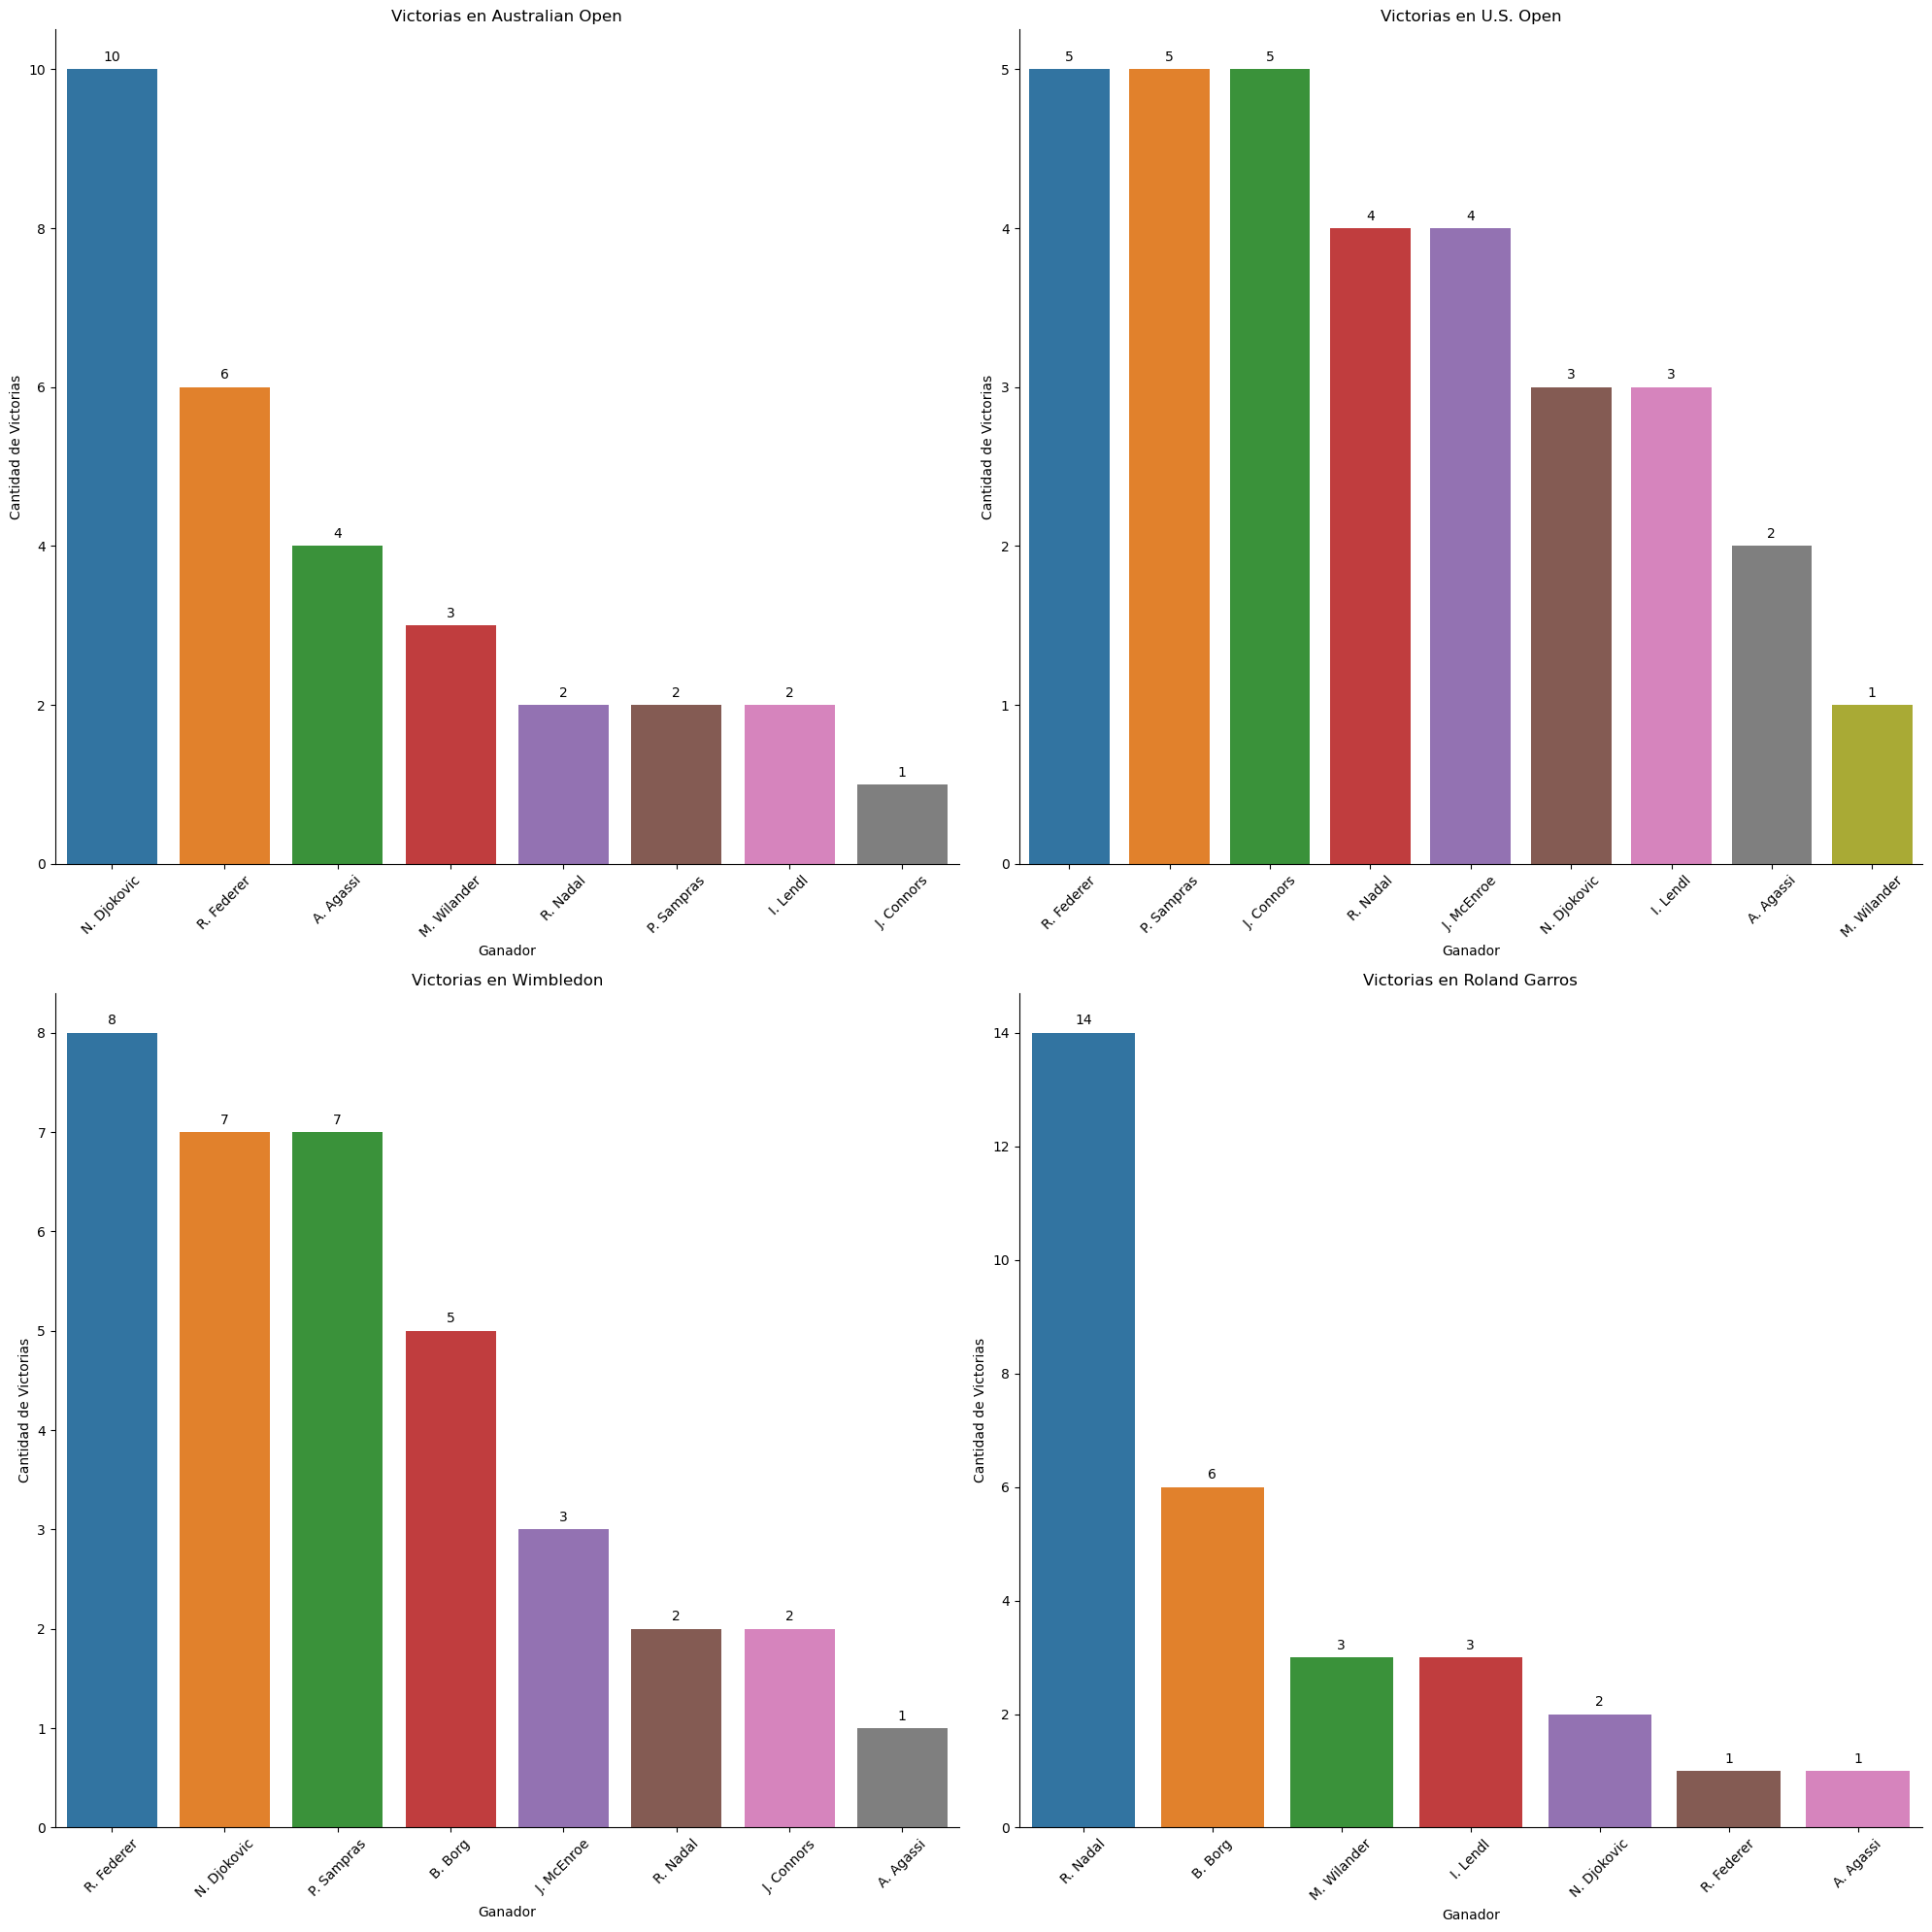

In [41]:
# Figura subgráficos array 2x2
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20), constrained_layout = True)

# Torneos únicos
torneos = df_majors['TOURNAMENT'].unique()[:4]  

# Gráfico 
for ax, torneos in zip(axes.flatten(), torneos):

    # Jugadores en los 10 primeros
    df_torneos = df_top_victorias[df_top_victorias['TOURNAMENT'] == torneos]

    # Victorias por cada uno y ordena de mayor a menor
    victorias_orden = df_torneos['WINNER'].value_counts().index
    
    # Countplot
    sns.countplot(x = 'WINNER', data = df_torneos, ax = ax, order = victorias_orden)
    
    # Etiquetas
    ax.set_title(f'Victorias en {torneos}')
    ax.set_xlabel('Ganador')
    ax.set_ylabel('Cantidad de Victorias')

    ax.set_xticklabels(victorias_orden, rotation=45)

    # Valores 
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
        
    # Quitar las líneas superior y derecha
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Se da la circunstancia que en todo los majors, siempre hay un numero de ganadores que se repiten con bastante frecuencia, destacando en particular los casos de Rafa Nadal con Roland Garros y Novak Djokovic en el Australian Open, y sobre todo Nadal con sus 14 victorias destacando sus 6 victorias consecutivas (201-2022)

## Hipotesis 3 - Jugadores con mas Grand Slams

In [42]:
# Agrupar por ganador y contar el número total de victorias
victorias_totales = df_majors.groupby('WINNER').size().reset_index(name = 'Total Wins')
#victorias_totales

In [43]:
# Ordenar los jugadores por el número total de victorias, de mayor a menor
top_ganadores = victorias_totales.sort_values(by = 'Total Wins', ascending = False)
#top_ganadores

In [44]:
# Top 10 jugadores con más victorias totales
top_10_ganadores = top_ganadores.head(10)
top_10_ganadores

,WINNER,Total Wins
43,R. Nadal,22
36,N. Djokovic,22
41,R. Federer,20
40,P. Sampras,14
8,B. Borg,11
0,A. Agassi,8
20,J. Connors,8
18,I. Lendl,8
35,M. Wilander,7
25,J. McEnroe,7


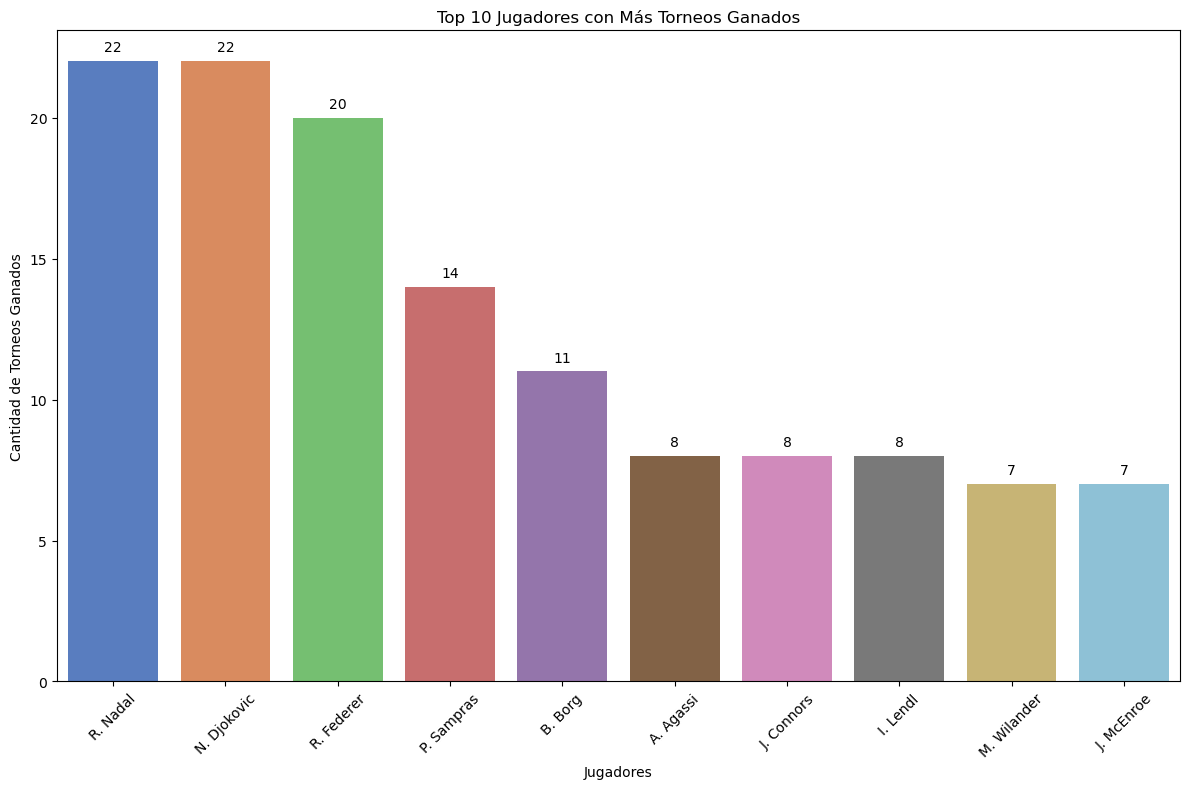

In [45]:
# Gráfico de barras 
plt.figure(figsize = (12, 8))

barplot = sns.barplot(x = 'WINNER', y = 'Total Wins', data = top_10_ganadores, palette = 'muted')

# Etiquetas
plt.title('Top 10 Jugadores con Más Torneos Ganados')
plt.xlabel('Jugadores')
plt.ylabel('Cantidad de Torneos Ganados')

plt.xticks(rotation = 45)

plt.tight_layout()

# Valores 
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
    
plt.show()

In [46]:
# 10 jugadores con más victorias
top_10_repeated_winners = top_victorias_repetidas.head(10)
top_10_repeated_winners

,WINNER,COUNTS
17,R. Nadal,22
13,N. Djokovic,22
16,R. Federer,19
15,P. Sampras,14
3,B. Borg,11
6,I. Lendl,8
10,J. McEnroe,7
7,J. Connors,7
12,M. Wilander,6
0,A. Agassi,6


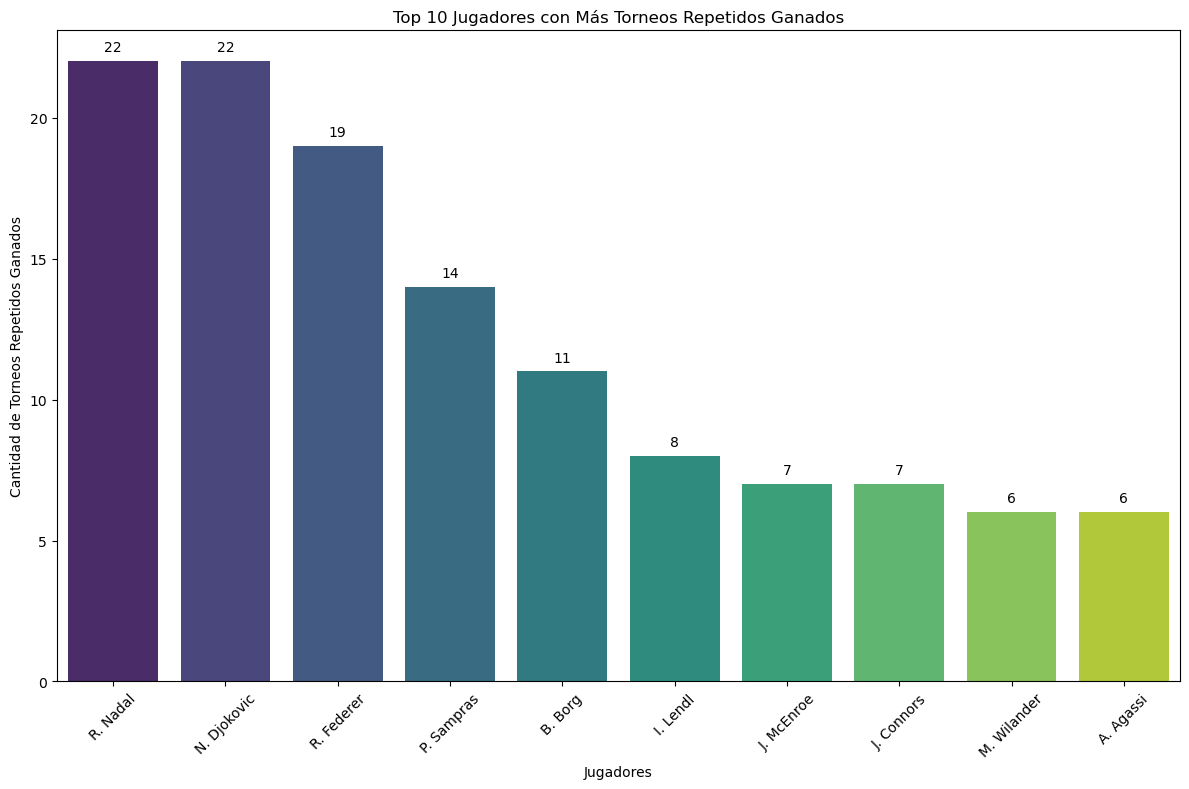

In [47]:
# Gráfico de barras 
plt.figure(figsize = (12, 8))

barplot = sns.barplot(x = 'WINNER', y = 'COUNTS', data = top_victorias_repetidas, palette = 'viridis')

# Etiquetas
plt.title('Top 10 Jugadores con Más Torneos Repetidos Ganados')
plt.xlabel('Jugadores')
plt.ylabel('Cantidad de Torneos Repetidos Ganados')

plt.xticks(rotation = 45)

plt.tight_layout()

# Valores
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.show()

### Los jugadores con mas torneos repetidos han sido Nada y Djokovic empatados a 22 torneos repetidos, seguido de Federer que completa el podium

In [48]:
# Jugadores mas torneos han ganado 
seleccion = ['R. Nadal', 'N. Djokovic', 'R. Federer']
df_seleccion = df_majors[df_majors['WINNER'].isin(seleccion)]
df_seleccion

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,1800000
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,3.0,25.0,right,Grass / Outdoor,2400000
3,2022,Roland Garros,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,2496000
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,1800000
6,2021,Wimbledon,N. Djokovic,M. Berrettini,Serbian,1.0,7.0,right,Grass / Outdoor,2400000
...,...,...,...,...,...,...,...,...,...,...
70,2005,Roland Garros,R. Nadal,M. Puerta,Spanish,2.0,10.0,left,Clay,2496000
72,2004,U.S. Open,R. Federer,L. Hewitt,Swiss,1.0,3.0,right,DecoTurf - outdoors,2600000
73,2004,Wimbledon,R. Federer,A. Roddick,Swiss,1.0,2.0,right,Grass / Outdoor,2400000
75,2004,Australian Open,R. Federer,M. Safin,Swiss,1.0,9.0,right,Rebound Ace,1800000


In [49]:
victorias_jugadores = df_seleccion.groupby(['WINNER', 'TOURNAMENT']).size().reset_index(name = 'Total Wins')
victorias_jugadores

,WINNER,TOURNAMENT,Total Wins
0,N. Djokovic,Australian Open,10
1,N. Djokovic,Roland Garros,2
2,N. Djokovic,U.S. Open,3
3,N. Djokovic,Wimbledon,7
4,R. Federer,Australian Open,6
5,R. Federer,Roland Garros,1
6,R. Federer,U.S. Open,5
7,R. Federer,Wimbledon,8
8,R. Nadal,Australian Open,2
9,R. Nadal,Roland Garros,14


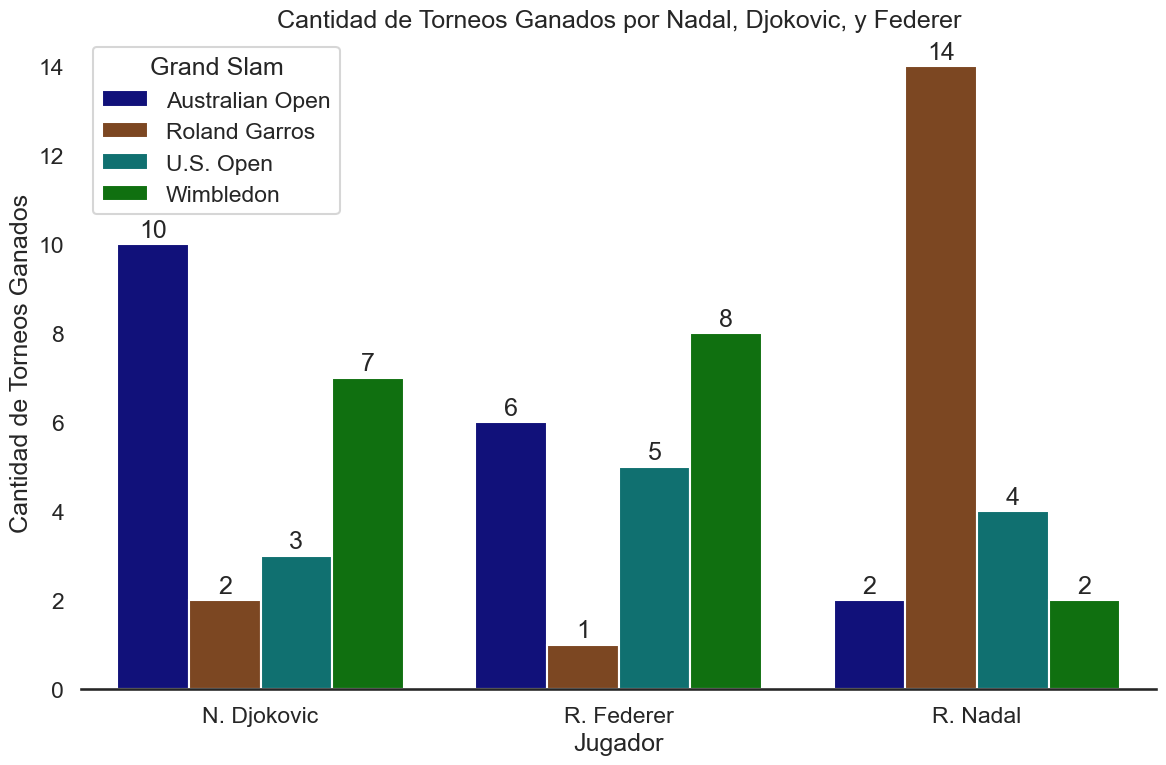

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los colores personalizados para cada torneo
colors = {
    'Australian Open': 'darkblue',
    'Roland Garros': 'saddlebrown',
    'Wimbledon': 'green',
    'U.S. Open': 'teal'
}

# Crear un gráfico de barras con colores personalizados
plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    x='WINNER',
    y='Total Wins',
    hue='TOURNAMENT',
    data=victorias_jugadores,
    palette=colors
)

# Título y etiquetas
plt.title('Cantidad de Torneos Ganados por Nadal, Djokovic, y Federer')
plt.xlabel('Jugador')
plt.ylabel('Cantidad de Torneos Ganados')
plt.legend(title='Grand Slam')

# Configurar los bordes: eliminar todos menos el inferior
sns.despine(bottom=False, left=True, right=True, top=True)

# Añadir valores encima de cada barra
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


### Es importante destacar el dominio de Rafa Nadal en la tierra batida, es significativamente superior a cualquier otro jugador, con lo que le ha llevado a ser nombrado "Rey de la tierra batida", al igual que Nadal destaca en tierra, Djokovic lo hace en Australia y Federer en Winbledon por lo que esto refleja que cado uno de los jugadores tiene una superficie en la que destaca excepcionalmente. 

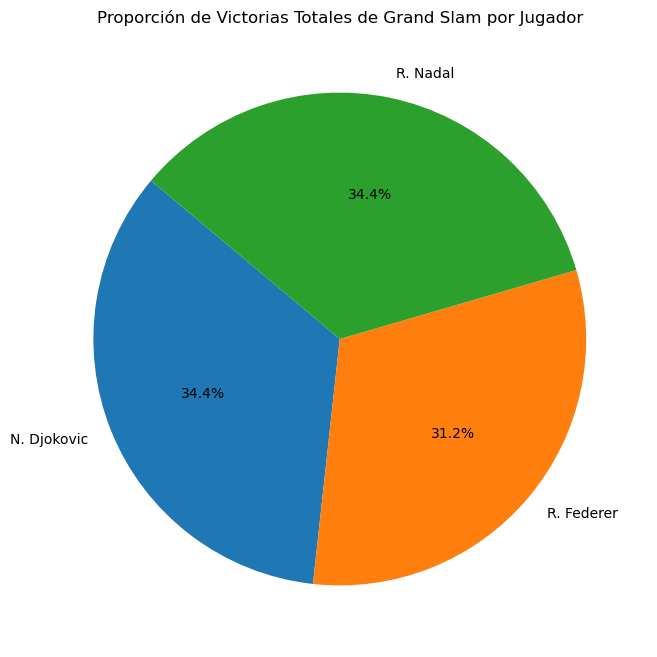

In [51]:
# Proporcion de victorias en Grand slam
victorias_total_jugador = victorias_jugadores.groupby('WINNER')['Total Wins'].sum()

# Gráfico de tarta 
plt.figure(figsize = (8, 8))
plt.pie(victorias_total_jugador, labels = victorias_total_jugador.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Proporción de Victorias Totales de Grand Slam por Jugador')

plt.show()

### Jugadores que han jugado mas finales 

In [52]:
# Ganadores y subcampeones  ## FINALIST
finalistas = pd.concat([df_majors['WINNER'], df_majors['RUNNER-UP']])

In [53]:
# Contar las apariciones de cada jugador en finales.
finals_count = finalistas.value_counts().reset_index()
finals_count.columns = ['PLAYER', 'FINALS_PLAYED']

# Ordenar los jugadores por el número de finales jugadas y obtener los primeros 10
top_finalistas = finals_count.head(10)
top_finalistas

,PLAYER,FINALS_PLAYED
0,N. Djokovic,33
1,R. Federer,31
2,R. Nadal,30
3,I. Lendl,19
4,P. Sampras,18
5,B. Borg,16
6,J. Connors,15
7,A. Agassi,15
8,S. Edberg,11
9,M. Wilander,11


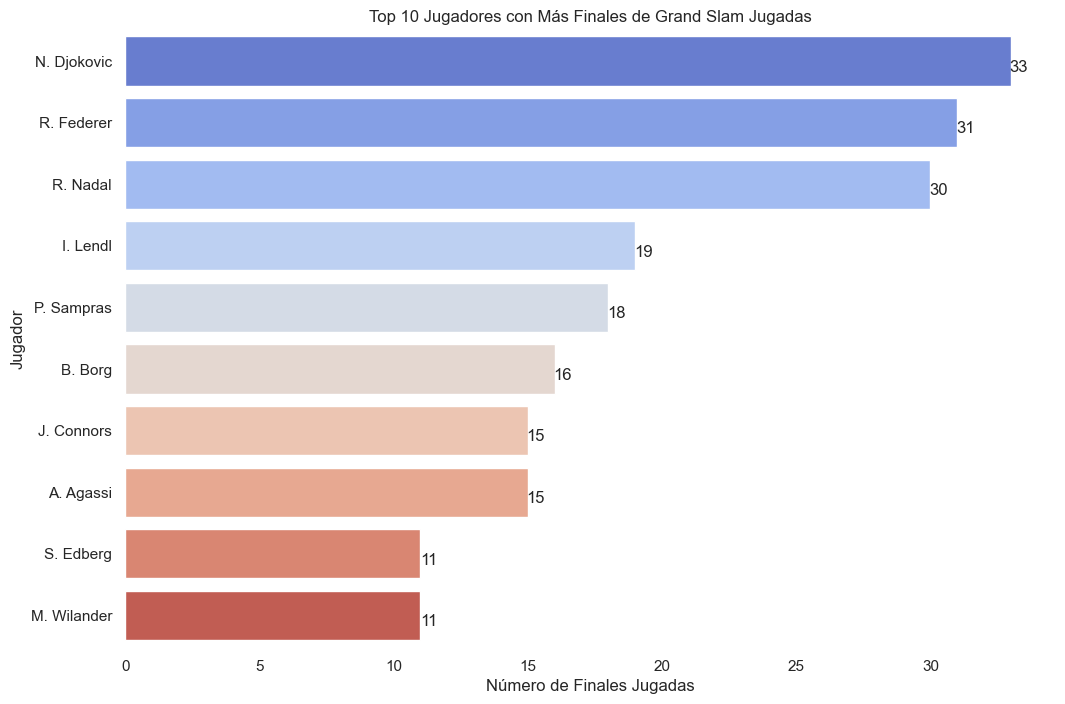

In [111]:

# Establecer el estilo de Seaborn para que no muestre la cuadrícula
sns.set(style="white")

# Figura
plt.figure(figsize=(12, 8))

# Gráfico de barras
ax = sns.barplot(x='FINALS_PLAYED', y='PLAYER', data=top_finalistas, palette='coolwarm')

# Añadir etiquetas y título
ax.set_title('Top 10 Jugadores con Más Finales de Grand Slam Jugadas')
ax.set_xlabel('Número de Finales Jugadas')
ax.set_ylabel('Jugador')

# Mostrar los valores
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.3, p.get_y() + p.get_height() / 2 + 0.1,
             '{:1.0f}'.format(width),
             ha='center', va='center')

# Quitar las líneas de los bordes
sns.despine(left=True, bottom=True)

plt.show()

## Hipotesis 4 - Jugador que más tiempo ha estado en el Top 1 y en el Top 10 

In [55]:
# Extraer solo la fila donde 'Posicion' es 1 (número uno del mundo)
top_ranking_cada_año = df_ATP_1973_to_2010[df_ATP_1973_to_2010['Posicion'] == 1] 
top_ranking_cada_año

,Posicion,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,I. Nastase,J. Connors,J. Connors,J. Connors,J. Connors,J. Connors,B. Borg,B. Borg,J. McEnroe,...,R. Nadal,N. Djokovic,R. Federer,N. Djokovic,N. Djokovic,N. Djokovic,N. Djokovic,R. Nadal,R. Nadal,N. Djokovic


In [56]:
# Contar cuántas veces cada jugador ha sido número uno al final del año
numero_1 = top_ranking_cada_año.iloc[0, 1:].value_counts().reset_index() # number_one_counts
numero_1.columns = ['Jugador', 'Terminan_año_No_1']

In [57]:
# Ordenar los jugadores por la cantidad de años que terminaron como número uno
number_1_sorted = numero_1.sort_values(by='Terminan_año_No_1', ascending=False)
number_1_sorted

,Jugador,Terminan_año_No_1
0,J. Connors,6
1,P. Sampras,6
2,R. Federer,6
3,N. Djokovic,6
4,I. Lendl,4
5,R. Nadal,4
6,J. McEnroe,3
7,S. Edberg,3
8,B. Borg,2
9,A. Agassi,2


In [58]:
# Extraer las filas de las 10 primeras posiciones de cada año
top_10_cada_año = df_ATP_1973_to_2010[df_ATP_1973_to_2010['Posicion'] <= 10]
#top_10_cada_año

In [59]:
# Concatenar todos los jugadores de las primeras 10 posiciones de cada columna (año)
top_10_jugadores = pd.concat([top_10_cada_año[year] for year in top_10_cada_año.columns if year.isdigit()])
top_10_jugadores

0          I. Nastase
1         J. Newcombe
2          M. Orantes
3            S. Smith
4          J. Connors
           ...       
5           A. Zverev
6        S. Tsitsipas
7        K. Nishikori
8        K. Khachanov
9    R. Bautista Agut
Length: 470, dtype: object

In [60]:
# Contar las apariciones y resetear el índice 
top_ten_counts = top_10_jugadores.value_counts().reset_index()
top_ten_counts.columns = ['Jugador', 'Años_en_Top_10']

In [61]:
# Ordenar los jugadores por la cantidad de años que estuvieron en el Top 10
top_10_orden = top_ten_counts.sort_values(by = 'Años_en_Top_10', ascending = False)
top_10_orden.head(10)  


,Jugador,Años_en_Top_10
0,R. Federer,17
2,A. Agassi,16
1,J. Connors,16
3,R. Nadal,15
4,I. Lendl,13
5,N. Djokovic,13
6,B. Becker,12
7,P. Sampras,12
8,G. Vilas,10
9,S. Edberg,10


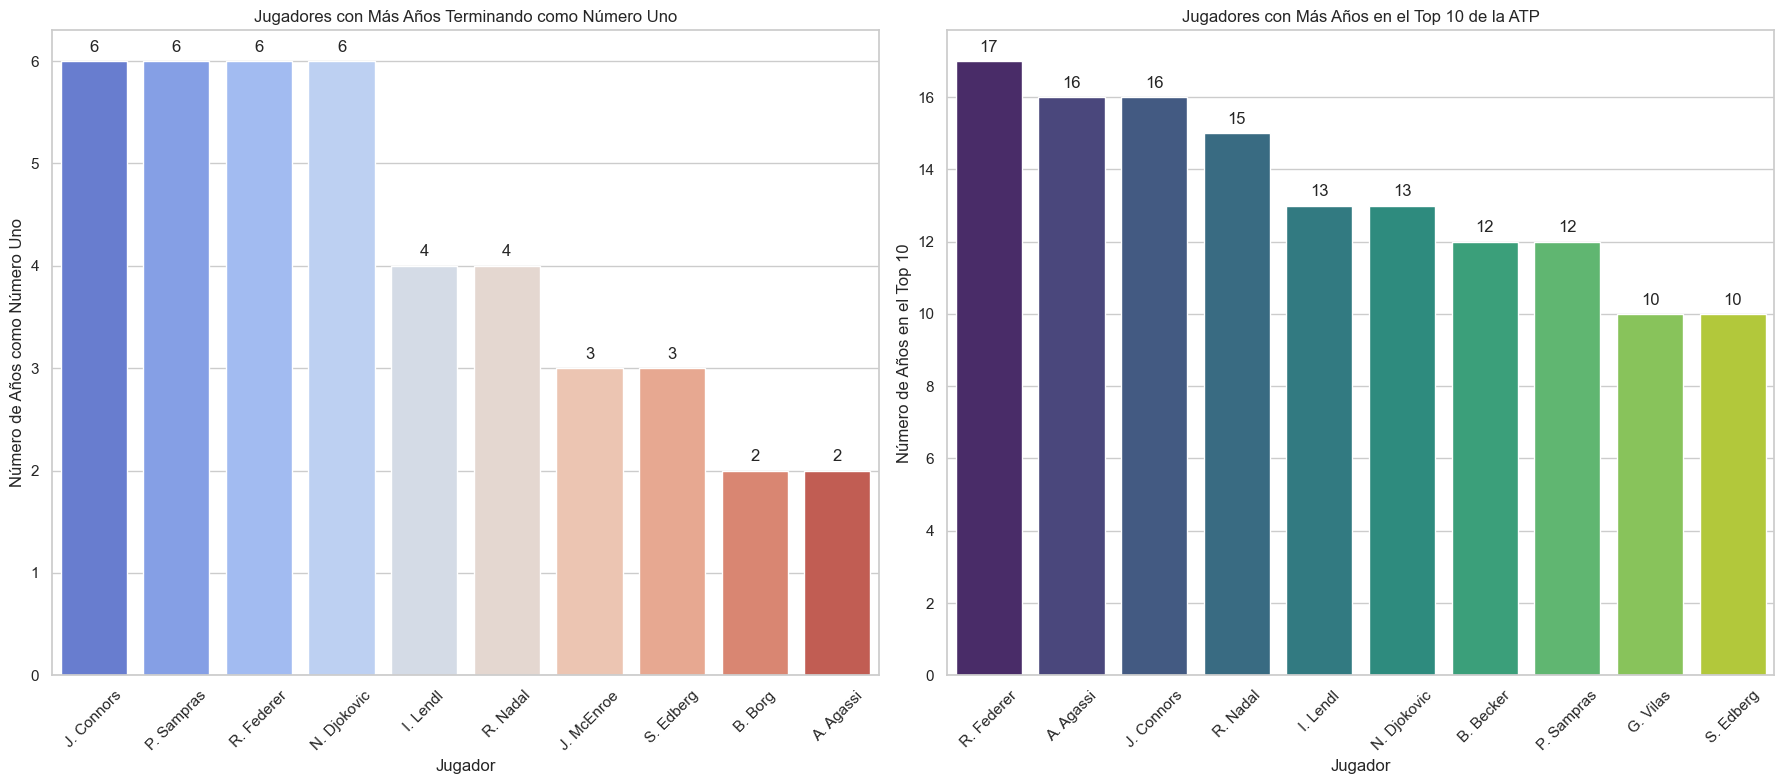

In [80]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Jugadores con más años terminando como número uno
ax1 = sns.barplot(x = 'Jugador', y = 'Terminan_año_No_1', data = number_1_sorted.head(10), 
            palette='coolwarm', ax=axes[0])
axes[0].set_title('Jugadores con Más Años Terminando como Número Uno')
axes[0].set_ylabel('Número de Años como Número Uno')
axes[0].set_xlabel('Jugador')
axes[0].tick_params(axis = 'x', rotation = 45)

# Añadir etiquetas
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va ='center', 
                 xytext = (0, 10), textcoords = 'offset points')

# Jugadores con más años en el Top 10
ax2 = sns.barplot(x = 'Jugador', y = 'Años_en_Top_10', data = top_10_orden.head(10), 
            palette = 'viridis', ax = axes[1])
axes[1].set_title('Jugadores con Más Años en el Top 10 de la ATP')
axes[1].set_ylabel('Número de Años en el Top 10')
axes[1].set_xlabel('Jugador')
axes[1].tick_params(axis = 'x', rotation = 45)

# Añadir etiquetas
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), textcoords = 'offset points')
   

plt.tight_layout()

plt.show()

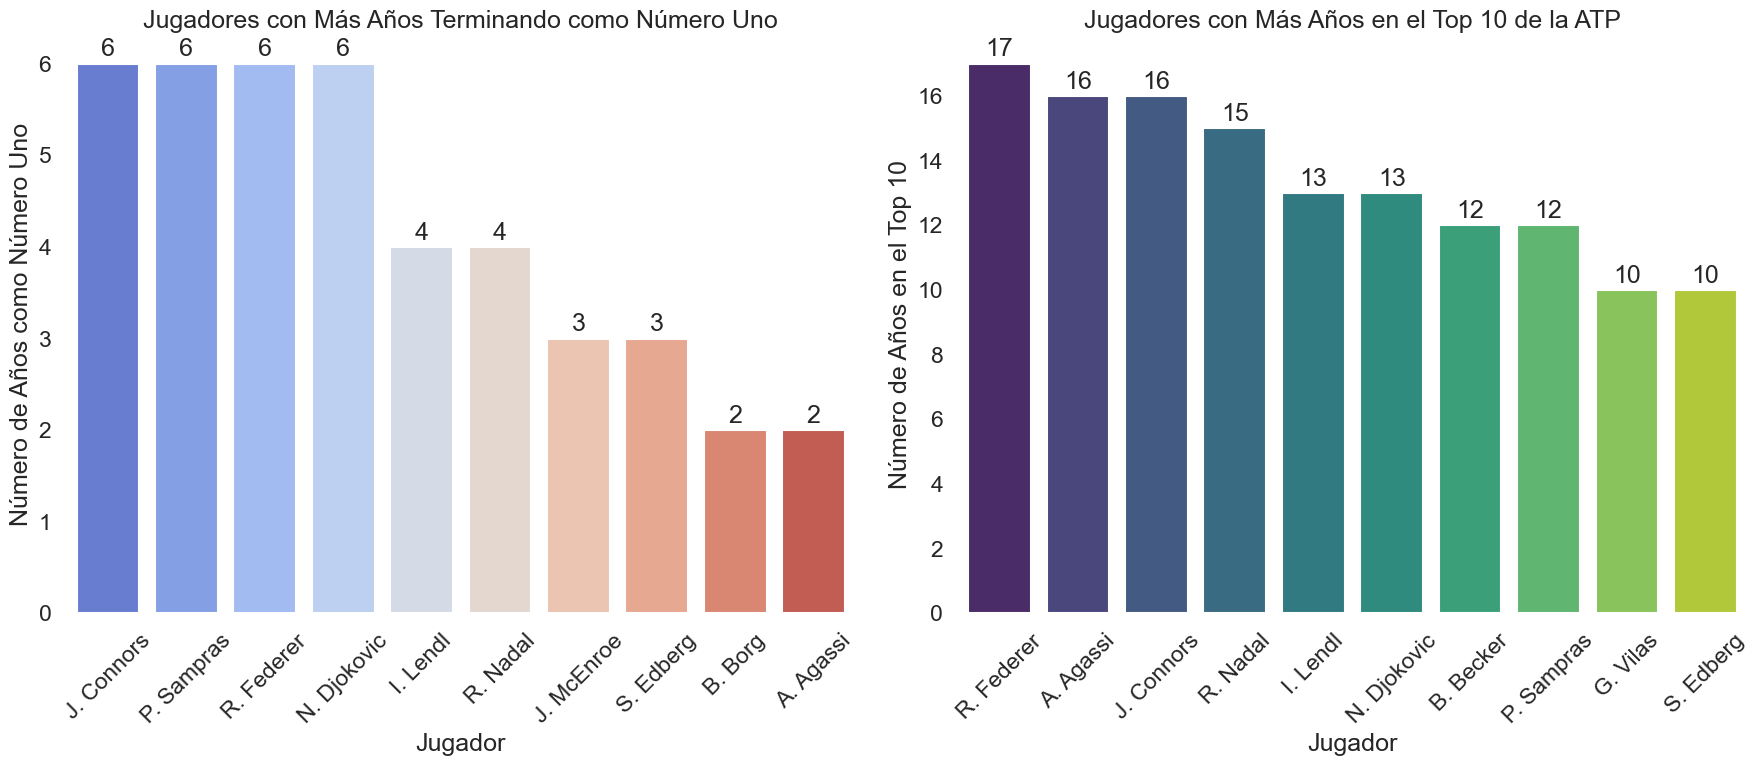

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo general del gráfico
sns.set(style="white", context='talk')

# Crear una figura con dos subplots (uno al lado del otro)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Primer gráfico: Jugadores con más años terminando como número uno
ax1 = sns.barplot(x='Jugador', y='Terminan_año_No_1', data=number_1_sorted.head(10),
                  palette='coolwarm', ax=axes[0])
axes[0].set_title('Jugadores con Más Años Terminando como Número Uno')
axes[0].set_ylabel('Número de Años como Número Uno')
axes[0].set_xlabel('Jugador')
axes[0].tick_params(axis='x', rotation=45)
# Eliminar bordes del gráfico
for spine in ax1.spines.values():
    spine.set_visible(False)

# Añadir etiquetas a las barras del primer gráfico
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 10), textcoords='offset points')

# Segundo gráfico: Jugadores con más años en el Top 10
ax2 = sns.barplot(x='Jugador', y='Años_en_Top_10', data=top_10_orden.head(10),
                  palette='viridis', ax=axes[1])
axes[1].set_title('Jugadores con Más Años en el Top 10 de la ATP')
axes[1].set_ylabel('Número de Años en el Top 10')
axes[1].set_xlabel('Jugador')
axes[1].tick_params(axis='x', rotation=45)
# Eliminar bordes del gráfico
for spine in ax2.spines.values():
    spine.set_visible(False)

# Añadir etiquetas a las barras del segundo gráfico
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 10), textcoords='offset points')

# Ajustar el layout para evitar que los elementos se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### Hipótesis: Los jugadores zurdos tienen una ventaja en ciertas superficies o torneos específicos debido a su estilo de juego único

In [63]:
# Agrupar por mano dominante y contar victorias
mano_dominante = df_majors.groupby('WINNER_LEFT_OR_RIGHT_HANDED')['TOURNAMENT'].count().reset_index()
mano_dominante.columns = ['Mano', 'Victorias']
mano_dominante

,Mano,Victorias
0,left,47
1,right,152


In [64]:
# Agrupar por superficie y mano dominante y contar victorias
superficie = df_majors.groupby(['TOURNAMENT_SURFACE', 'WINNER_LEFT_OR_RIGHT_HANDED'])['TOURNAMENT'].count().reset_index()
superficie.columns = ['Superficie', 'Mano', 'Victorias']
superficie

,Superficie,Mano,Victorias
0,Clay,left,17
1,Clay,right,33
2,Clay - outdoors,left,3
3,DecoTurf - outdoors,left,11
4,DecoTurf - outdoors,right,34
5,Grass,left,4
6,Grass,right,10
7,Grass / Outdoor,left,8
8,Grass / Outdoor,right,41
9,Plexicushion Prestige,left,2


In [91]:
# Contar las victorias por tipo de mano (diestro o zurdo)
victorias_mano = df_majors['WINNER_LEFT_OR_RIGHT_HANDED'].value_counts()
victorias_mano

WINNER_LEFT_OR_RIGHT_HANDED
right    152
left      47
Name: count, dtype: int64

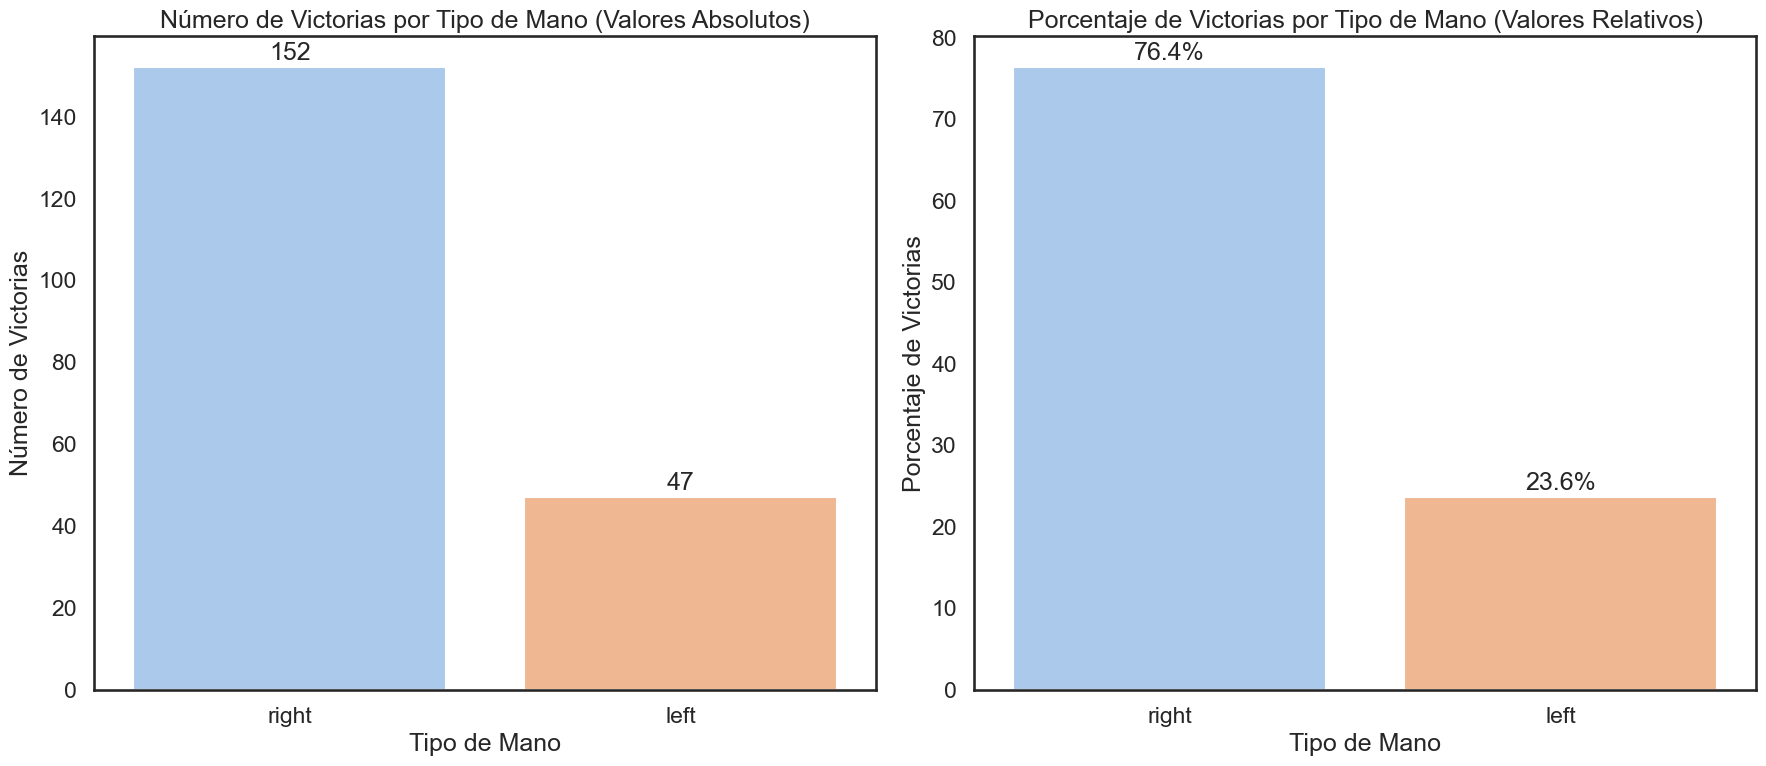

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las victorias por tipo de mano (diestro o zurdo)
hand_counts = df_majors['WINNER_LEFT_OR_RIGHT_HANDED'].value_counts()

# Crear figura y ejes para los gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Gráfico de valores absolutos
sns.barplot(x=victorias_mano.index, y=victorias_mano.values, ax=axes[0], palette='pastel')
axes[0].set_title('Número de Victorias por Tipo de Mano (Valores Absolutos)')
axes[0].set_ylabel('Número de Victorias')
axes[0].set_xlabel('Tipo de Mano')

for p in axes[0].patches:
    axes[0].annotate(format(int(p.get_height()), 'd'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

# Gráfico de valores relativos
victorias_mano_relativas = victorias_mano / victorias_mano.sum() * 100
sns.barplot(x=victorias_mano_relativas.index, y=victorias_mano_relativas.values, ax=axes[1], palette='pastel')
axes[1].set_title('Porcentaje de Victorias por Tipo de Mano (Valores Relativos)')
axes[1].set_ylabel('Porcentaje de Victorias')
axes[1].set_xlabel('Tipo de Mano')

# Añadir etiquetas a las barras del segundo gráfico
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.1f') + '%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

# Mostrar gráficos
plt.tight_layout()
plt.show()


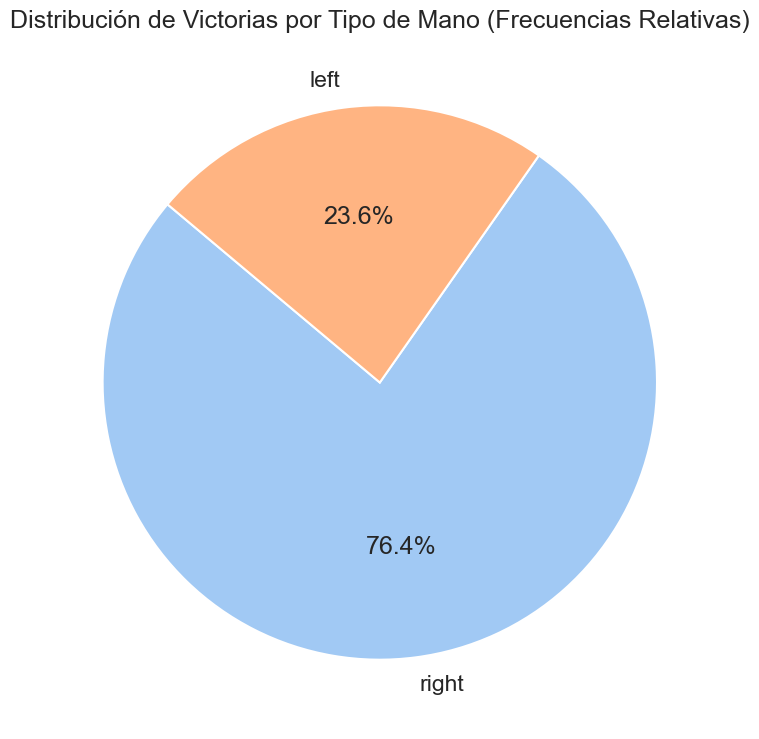

In [101]:
# Crear figura para el gráfico de tarta de frecuencias relativas
fig, ax = plt.subplots(figsize=(9, 9))

# Gráfico de tarta para valores relativos
ax.pie(hand_counts_relative, labels=hand_counts_relative.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
ax.set_title('Distribución de Victorias por Tipo de Mano (Frecuencias Relativas)')

# Mostrar el gráfico
plt.show()


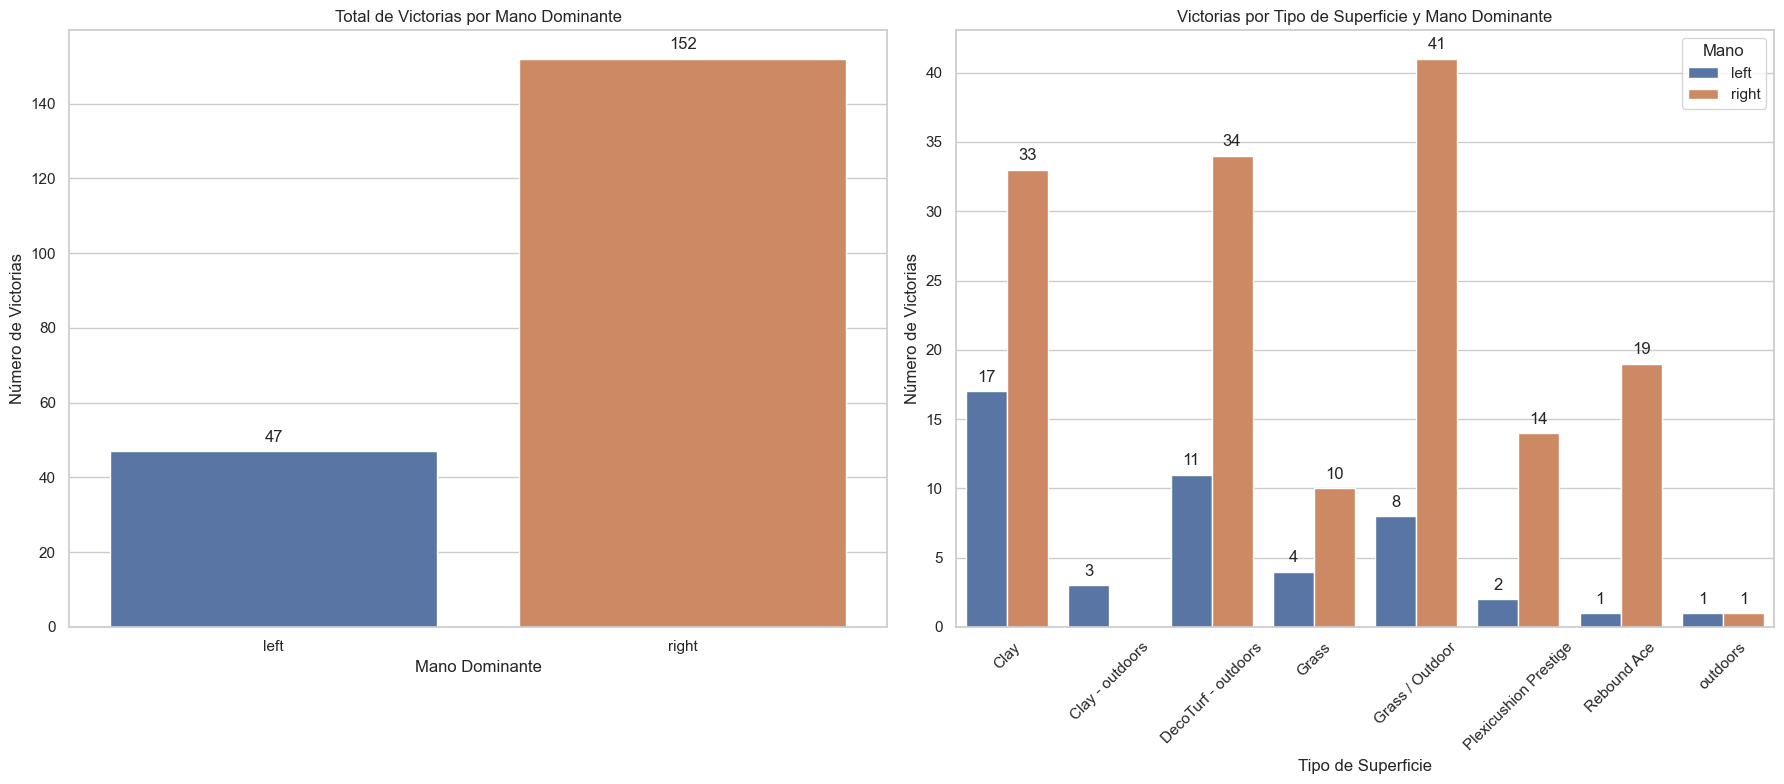

In [65]:
# Gráficos 1x2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Análisis general
sns.barplot(x = 'Mano', y = 'Victorias', data = mano_dominante, ax = axes[0])
axes[0].set_title('Total de Victorias por Mano Dominante')
axes[0].set_ylabel('Número de Victorias')
axes[0].set_xlabel('Mano Dominante')

for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), textcoords = 'offset points')


# Análisis por superficie
sns.barplot(x = 'Superficie', y = 'Victorias', hue = 'Mano', data = superficie, ax = axes[1])

axes[1].set_title('Victorias por Tipo de Superficie y Mano Dominante')
axes[1].set_ylabel('Número de Victorias')
axes[1].set_xlabel('Tipo de Superficie')

# Etiquetas
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), textcoords = 'offset points')

axes[1].tick_params(axis = 'x', rotation = 45) 

plt.tight_layout()
plt.show()


In [103]:
surface_wins = df_majors.groupby(['TOURNAMENT_SURFACE', 'WINNER_LEFT_OR_RIGHT_HANDED']).size().reset_index(name='Victorias')

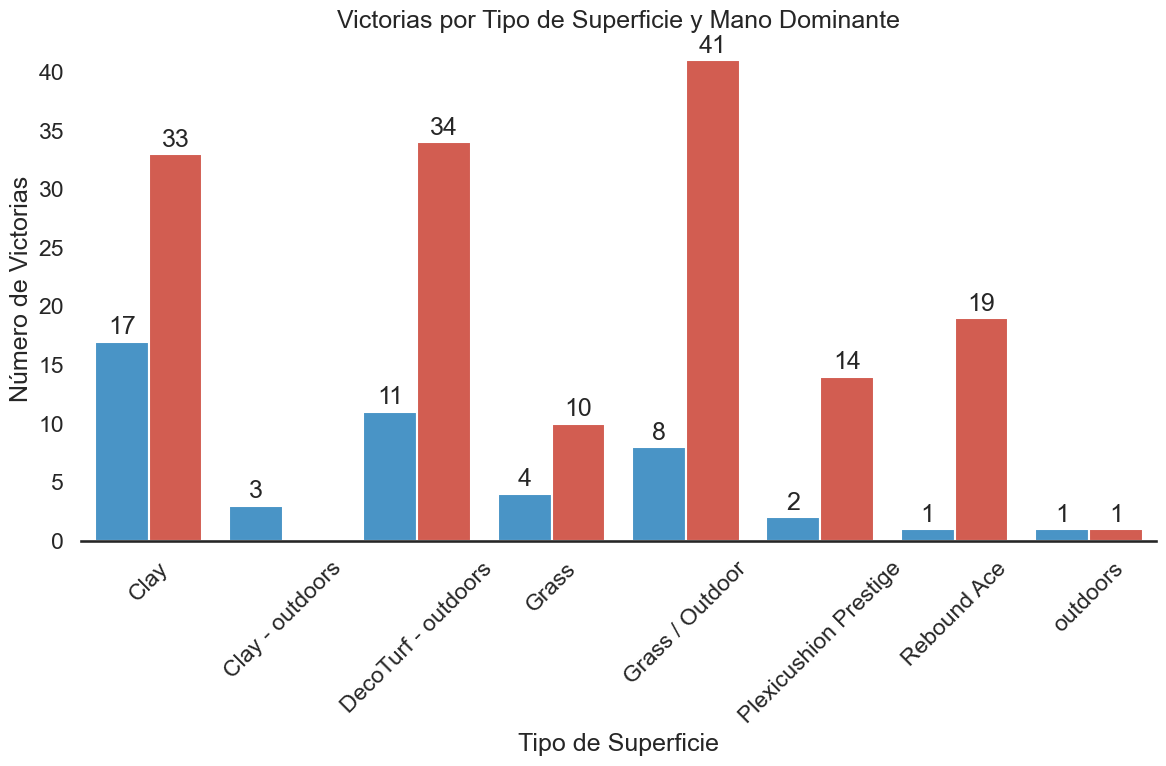

In [107]:
# Configurar el estilo del gráfico para mantener solo la línea del eje x inferior
sns.set(style="white", context='talk')

# Crear el gráfico de barras para análisis por superficie con ajustes específicos
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='TOURNAMENT_SURFACE', y='Victorias', hue='WINNER_LEFT_OR_RIGHT_HANDED', 
            data=surface_wins, ax=ax, palette=["#3498db", "#e74c3c"])  # Azul para diestros, rojo para zurdos

ax.set_title('Victorias por Tipo de Superficie y Mano Dominante')
ax.set_ylabel('Número de Victorias')
ax.set_xlabel('Tipo de Superficie')
# Mantener solo la línea del eje x inferior
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['bottom'].set_visible(True)

# Eliminar la leyenda
ax.legend_.remove()

# Añadir etiquetas de valor
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

ax.tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


 # Hipotesis - RAFA NADAL - REY DE LA TIERRA BATIDA

In [66]:
# Filtrar los datos para torneos en superficies de tierra batida ('Clay')
torneos_tierra = df_majors[df_majors['TOURNAMENT_SURFACE'].str.contains('Clay', case=False)]
#torneos_tierra

In [67]:
# Contar las victorias y sumar los premios en torneos de tierra batida para cada jugador
premios_victoria_tierra = torneos_tierra.groupby('WINNER').agg({
    'TOURNAMENT': 'count',
    'WINNER_PRIZE': 'sum'
}).reset_index()
#premios_victoria_tierra

In [68]:
premios_victoria_tierra.columns = ['Player', 'Clay Victories', 'Total Clay Prize Money']

In [69]:
# Ordenar victorias y premios en tierra batida
premios_victoria_ordenados = premios_victoria_tierra.sort_values(by=['Clay Victories', 'Total Clay Prize Money'], ascending = [False, False])
premios_victoria_ordenados

,Player,Clay Victories,Total Clay Prize Money
19,R. Nadal,14,34944000
4,B. Borg,6,14976000
7,G. Kuerten,3,7488000
9,I. Lendl,3,7488000
16,M. Wilander,3,7488000
8,G. Vilas,2,5096000
12,J. Courier,2,4992000
17,N. Djokovic,2,4992000
20,S. Bruguera,2,4992000
11,J. Connors,1,2600000


In [70]:
# Verificar la posición de Rafael Nadal
#nadal_clay_stats = premios_victoria_ordenados[premios_victoria_ordenados['Player'] == 'Rafael Nadal']
premios_victoria_ordenados.head()


,Player,Clay Victories,Total Clay Prize Money
19,R. Nadal,14,34944000
4,B. Borg,6,14976000
7,G. Kuerten,3,7488000
9,I. Lendl,3,7488000
16,M. Wilander,3,7488000


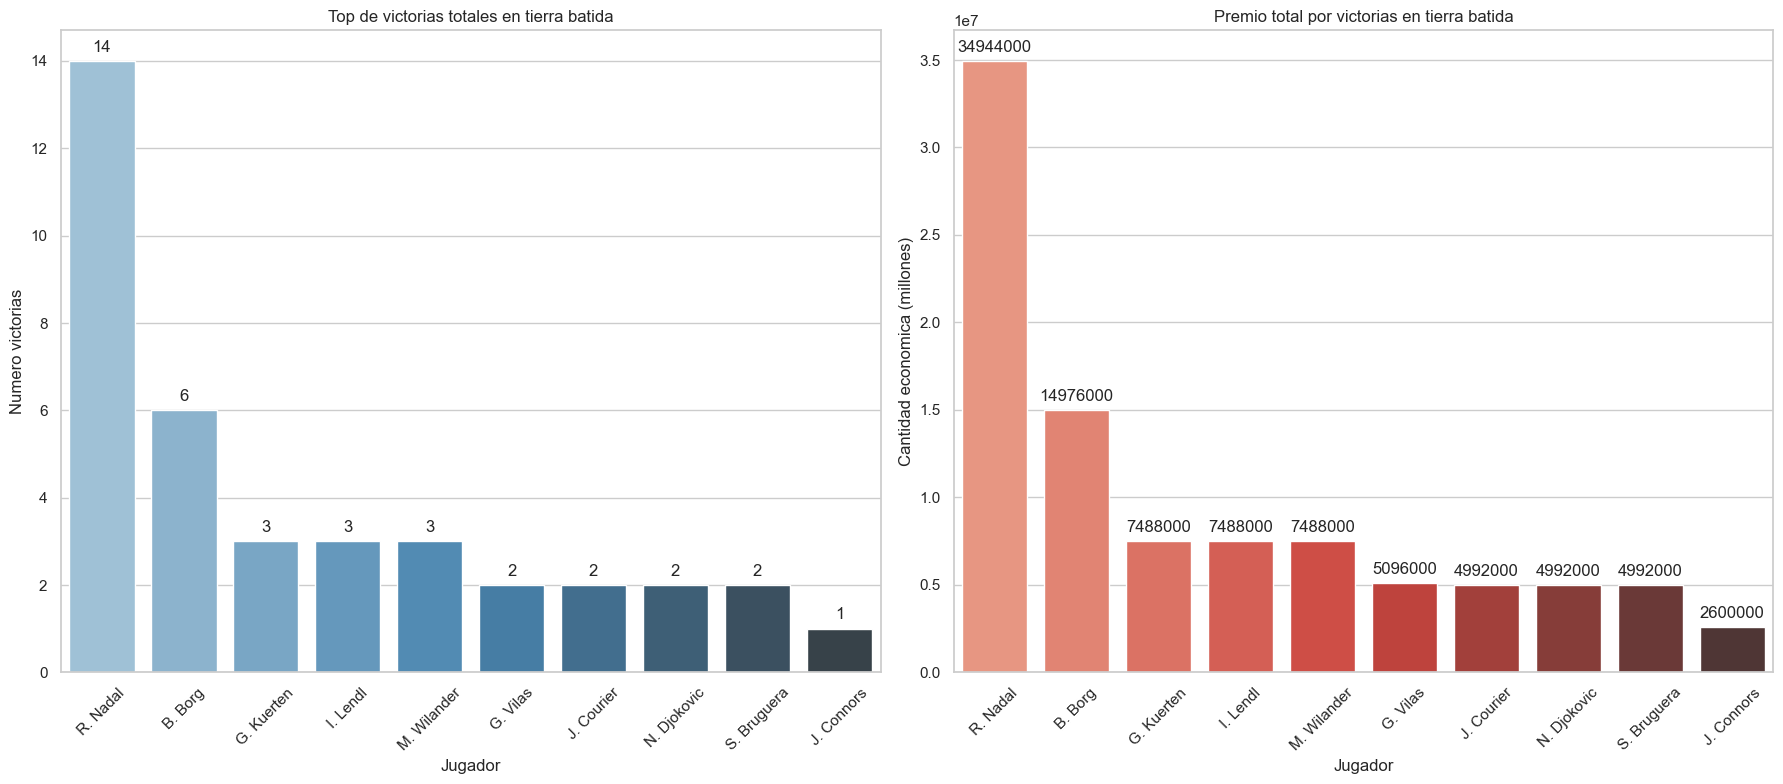

In [71]:
# Gráficos 1x2 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))

# Gráfico victorias en tierra batida
sns.barplot(x='Player', y='Clay Victories', data = premios_victoria_ordenados.head(10), ax = axes[0], palette = 'Blues_d')

axes[0].set_title('Top de victorias totales en tierra batida')
axes[0].set_ylabel('Numero victorias')
axes[0].set_xlabel('Jugador')

axes[0].tick_params(axis = 'x', rotation = 45)

for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), textcoords = 'offset points')

# Gráfico premios ganados en tierra batida
sns.barplot(x = 'Player', y = 'Total Clay Prize Money', data=premios_victoria_ordenados.head(10), ax = axes[1], palette = 'Reds_d')
axes[1].set_title('Premio total por victorias en tierra batida')
axes[1].set_ylabel('Cantidad economica (millones)')
axes[1].set_xlabel('Jugador')

axes[1].tick_params(axis = 'x', rotation = 45)

for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [72]:
roland_garros = df_majors[df_majors['TOURNAMENT'].str.contains('Roland Garros', case = False)]

# Función calcular las rachas de victorias consecutivas en Roland Garroscalculate_consecutive_wins
def victorias_consecutivas(data):
    data = data.sort_values(by = 'YEAR')
    data['Año anterior'] = data['YEAR'].shift(1)
    data['Victoria consecutiva'] = (data['YEAR'] - data['Año anterior'] == 1)
    max_racha = 0
    racha = 0
    for consecutive in data['Victoria consecutiva']:
        if consecutive:
            racha += 1
        else:
            racha = 0
        max_racha = max(max_racha, racha)
    return max_racha + 1  # +1 to include the first year of the sequence

In [73]:
# Aplicar la función a cada jugador en el dataset de Roland Garros
victorias_consecutivas = {player: victorias_consecutivas(roland_garros[roland_garros['WINNER'] == player])
                    for player in roland_garros['WINNER'].unique()}

In [74]:
# Ordenar los jugadores por la longitud de sus rachas de victorias consecutivas
victorias_consc_ordenadas = dict(sorted(victorias_consecutivas.items(), key = lambda item: item[1], reverse=True))

In [75]:
# Filtrar jugadores con más de 1 Roland Garros consecutivo filtered_players
filtered_players = {player: wins for player, wins in victorias_consc_ordenadas.items() if wins > 1}

In [76]:
# Datos para el gráfico
jugadores_filtr = list(filtered_players.keys())
victorias_consc_filtr = list(filtered_players.values())

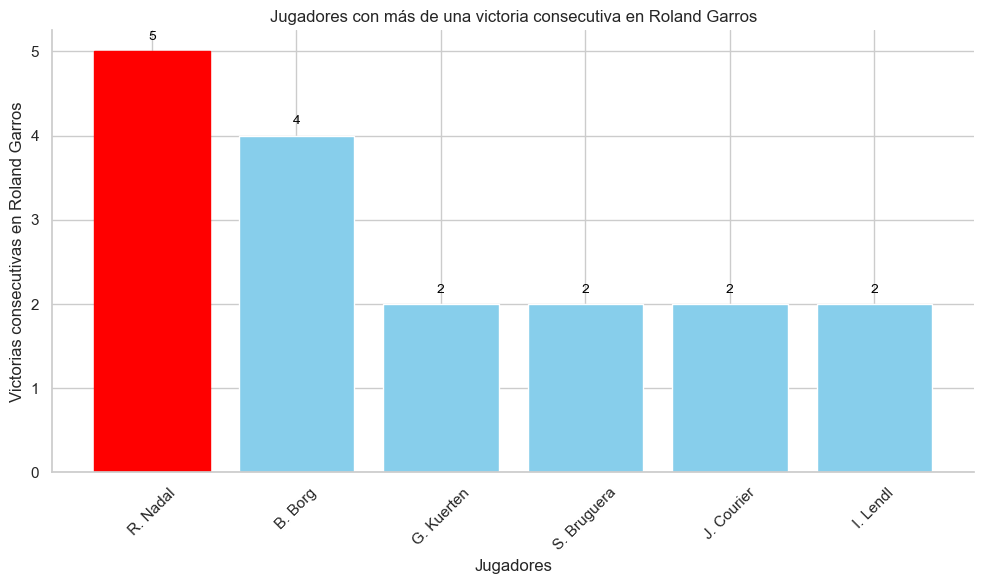

In [77]:
# Grafico
plt.figure(figsize=(10, 6))
bars_filtered = plt.bar(jugadores_filtr, victorias_consc_filtr, color = 'skyblue')

# Destacar a Rafael Nadal
nadal_reslt = jugadores_filtr.index('R. Nadal')
bars_filtered[nadal_reslt].set_color('red')

plt.xlabel('Jugadores')
plt.ylabel('Victorias consecutivas en Roland Garros')
plt.title('Jugadores con más de una victoria consecutiva en Roland Garros')

plt.xticks(rotation = 45)

# Valores
for bar, value in zip(bars_filtered, victorias_consc_filtr):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(value), ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()

plt.show()